In [1]:
#Imported Packages:

#Generic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Visualization
from scipy.stats import iqr
from scipy.stats import skew
from scipy.stats import kurtosis, shapiro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
test_data=pd.read_csv('test.csv',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
default_NA={'Alley':'NA','BsmtQual':'NA','BsmtCond':'NA','BsmtExposure':'NA',
            'BsmtFinType1':'NA','BsmtFinType2':'NA','FireplaceQu':'NA',
            'GarageType':'NA','GarageFinish':'NA',
            'GarageQual':'NA','GarageCond':'NA','PoolQC':'NA','Fence':'NA','MiscFeature':'NA'}
train_data=train_data.fillna(default_NA)
test_data=test_data.fillna(default_NA)

In [3]:
nulls = train_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0]/len(train_data))
    else:
        continue

LotFrontage 0.1773972602739726
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
Electrical 0.0006849315068493151
GarageYrBlt 0.05547945205479452


In [4]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


# Generate Synthetic Data and Augmentation

In [5]:
from synthetic_data_gen import augment_data
train_data_aug=augment_data(train_data)
train_data_aug

[False False False ... False False False]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.000000,9600.000000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.000000,11250.000000,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.000000,9550.000000,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.000000,14260.000000,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1113_1,20,RL,72.864955,7058.665237,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,7,2006,WD,Normal,130149.648386
2916,1292_3,160,RM,21.347372,1677.545534,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2009,WD,Normal,119304.039481
2917,489_2,190,RL,60.089998,10778.476175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2006,ConLD,Normal,159965.595651
2918,47_5,50,RL,48.091735,12887.206255,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,8,2009,WD,Abnorml,240120.960674


# Create Training and Validation Sets

In [6]:
X_train,X_valid,y_train,y_valid=train_test_split(train_data.loc[:,train_data.columns!='SalesPrice'],train_data.loc[:,train_data.columns=='SalesPrice'],test_size=0.2,random_state=42)
training = X_train.join(y_train)
validation = X_valid.join(y_valid)
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,NA,0,6,2007,WD,Normal,189950


In [7]:
training.to_csv('training.csv',index=False)
validation.to_csv('validation.csv',index=False)

In [8]:
nulls = training.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

LotFrontage 217
MasVnrType 6
MasVnrArea 6
Electrical 1
GarageYrBlt 64


In [9]:
nulls = validation.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

LotFrontage 42
MasVnrType 2
MasVnrArea 2
GarageYrBlt 17


In [10]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


In [11]:
def remove_outliers_and_get_skewness(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove the outliers
    filtered_data = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Calculate skewness
    column_skewness = skew(filtered_data[column_name], bias=False)

    return column_skewness
def count_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    print(Q1)
    print(Q3)
    IQR = Q3 - Q1

    # Define the outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"""Lower bound: {lower_bound}""")
    print(f"""Upper bound: {upper_bound}""")

    # Identify the outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Return the number of outliers
    return len(outliers)

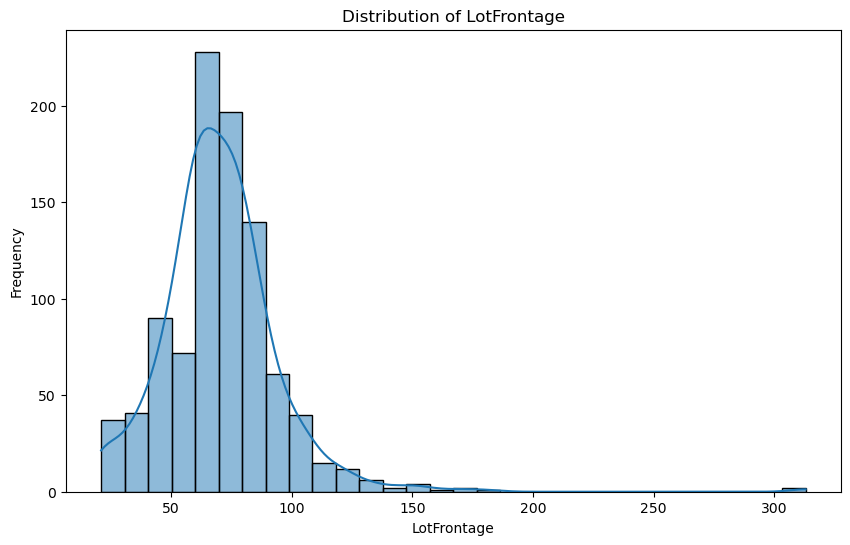

Skewness of LotFrontage before Imputing: 2.402989168767883
Skewness of LotFrontage after removing outliers: 0.0901739181888894
59.0
80.0
Lower bound: 27.5
Upper bound: 111.5
Number of outliers in LotFrontage: 68


In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(training['LotFrontage'], kde=True, bins=30)
plt.title(f'Distribution of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['LotFrontage'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage before Imputing: {feature_skewness}')
skewness=remove_outliers_and_get_skewness(training,'LotFrontage')
print(f'Skewness of LotFrontage after removing outliers: {skewness}')
num_outliers = count_outliers(training, 'LotFrontage')
print(f'Number of outliers in LotFrontage: {num_outliers}')

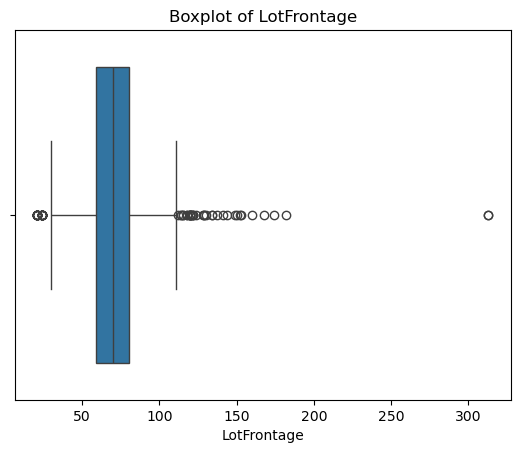

In [13]:
sns.boxplot(data=training, x='LotFrontage')

# Add labels and a title
plt.xlabel('LotFrontage')
plt.title('Boxplot of LotFrontage')

# Show the plot
plt.show()

In [14]:
training['LotFrontage_original']=training['LotFrontage']
training['MasVnrArea_original']=training['MasVnrArea']

In [15]:
from eda_imputation import fill_missing_values
training,validation,test_data=fill_missing_values(training,test_data,validation)

In [16]:
nulls = training.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if (row[0] > 0) and not (index.endswith('_original')):
        print(index, row[0])
    else:
        continue

In [17]:
nulls = validation.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [18]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [19]:
training.to_csv('training_filled.csv',index=False)
validation.to_csv('validation_filled.csv',index=False)
test_data.to_csv('test_filled.csv',index=False)

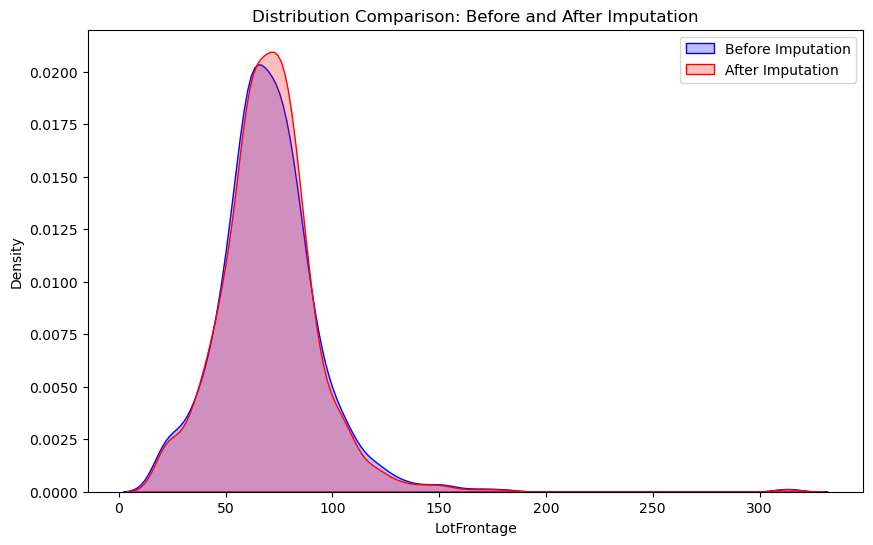

Skewness of LotFrontage after Imputing: 2.2800056884606157
Skewness of LotFrontage after removing outliers: 0.014363194947139404
60.0
80.0
Lower bound: 30.0
Upper bound: 110.0
Number of outliers in LotFrontage: 73


In [20]:
plt.figure(figsize=(10, 6))

# Plot original data
sns.kdeplot(training['LotFrontage_original'], label='Before Imputation', color='blue', shade=True)

# Plot imputed data
sns.kdeplot(training['LotFrontage'], label='After Imputation', color='red', shade=True)

# Add labels and title
plt.title('Distribution Comparison: Before and After Imputation')
plt.xlabel('LotFrontage')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()
feature_skewness = skew(training['LotFrontage'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage after Imputing: {feature_skewness}')
skewness=remove_outliers_and_get_skewness(training,'LotFrontage')
print(f'Skewness of LotFrontage after removing outliers: {skewness}')
num_outliers = count_outliers(training, 'LotFrontage')
print(f'Number of outliers in LotFrontage: {num_outliers}')

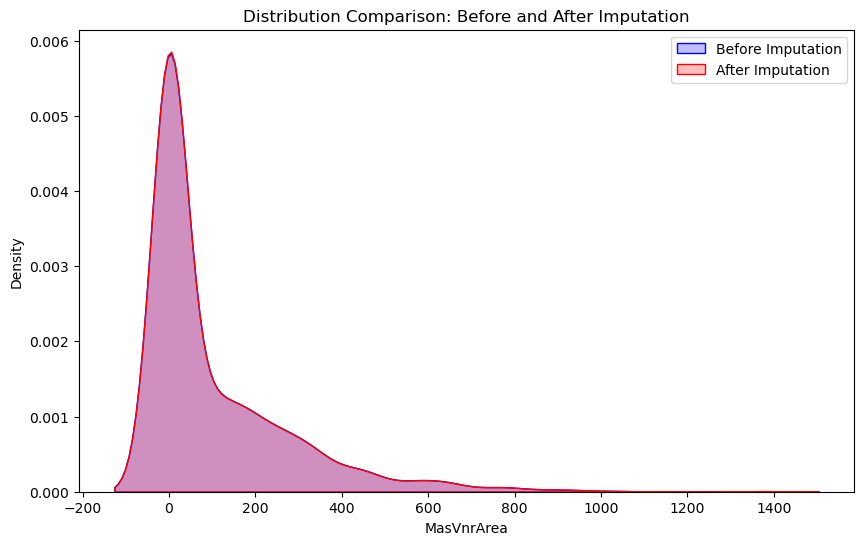

Skewness of LotFrontage after Imputing: 2.289205682330244
Skewness of LotFrontage after removing outliers: 1.4117426386197205
0.0
166.0
Lower bound: -249.0
Upper bound: 415.0
Number of outliers in LotFrontage: 77


In [21]:
plt.figure(figsize=(10, 6))

# Plot original data
sns.kdeplot(training['MasVnrArea_original'], label='Before Imputation', color='blue', shade=True)

# Plot imputed data
sns.kdeplot(training['MasVnrArea'], label='After Imputation', color='red', shade=True)

# Add labels and title
plt.title('Distribution Comparison: Before and After Imputation')
plt.xlabel('MasVnrArea')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()
feature_skewness = skew(training['MasVnrArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage after Imputing: {feature_skewness}')
skewness=remove_outliers_and_get_skewness(training,'MasVnrArea')
print(f'Skewness of LotFrontage after removing outliers: {skewness}')
num_outliers = count_outliers(training, 'MasVnrArea')
print(f'Number of outliers in LotFrontage: {num_outliers}')

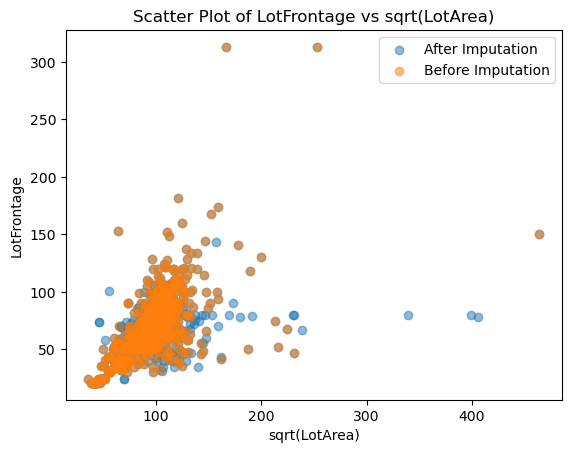

In [22]:
plt.scatter(np.sqrt(training['LotArea']), training['LotFrontage'], label='After Imputation', alpha=0.5)
plt.scatter(np.sqrt(training['LotArea']), training['LotFrontage_original'], label='Before Imputation', alpha=0.5)
plt.xlabel('sqrt(LotArea)')
plt.ylabel('LotFrontage')
plt.legend()
plt.title("Scatter Plot of LotFrontage vs sqrt(LotArea)")
plt.show()

In [23]:
training.drop(columns=[col for col in training.columns if col.endswith('_original')], inplace=True)
training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,255,20,RL,70.0,8400,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2010,WD,Normal,145000
1,1067,60,RL,59.0,7837,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2009,WD,Normal,178000
2,639,30,RL,67.0,8777,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,5,2008,WD,Normal,85000
3,800,50,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2007,WD,Normal,175000
4,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1096,20,RL,78.0,9317,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,3,2007,WD,Normal,176432
1164,1131,50,RL,65.0,7804,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,12,2009,WD,Normal,135000
1165,1295,20,RL,60.0,8172,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Normal,115000
1166,861,50,RL,55.0,7642,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,NA,0,6,2007,WD,Normal,189950


# Analysis and Transformations to the Response Variable

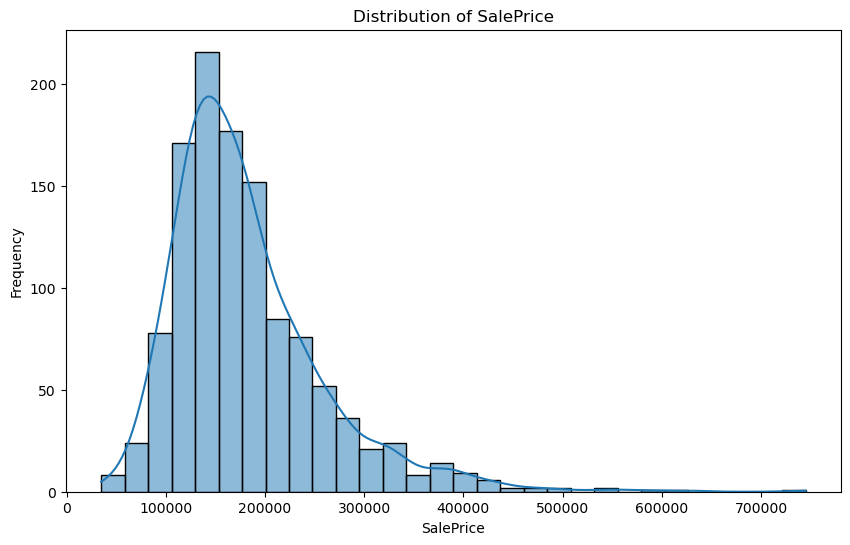

Skewness of SalePrice: 1.7408891554667465
Kurtosis: 5.4753
130000.0
214925.0
Lower bound: 2612.5
Upper bound: 342312.5
Number of outliers in LotFrontage: 48


In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(training['SalePrice'], kde=True, bins=30)
plt.title(f'Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['SalePrice'].dropna())  # dropna() to ignore missing values
print(f'Skewness of SalePrice: {feature_skewness}')
print(f"Kurtosis: {training['SalePrice'].kurtosis():.4f}")
num_outliers = count_outliers(training, 'SalePrice')
print(f'Number of outliers in LotFrontage: {num_outliers}')

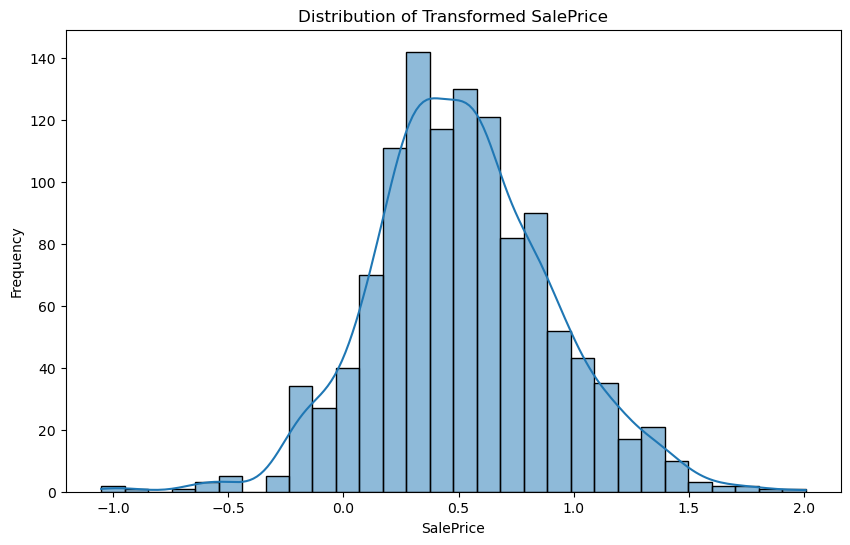

Skewness of SalePrice after transformation: 0.12471907609541613
Kurtosis after transformation: 0.7002
0.26236426446749106
0.7651189237801729
Lower bound: -0.4917677245015317
Upper bound: 1.5192509127491958
Number of outliers in SalePrice: 20


In [25]:
training['SalePrice']=np.log(training['SalePrice']/100000)
validation['SalePrice']=np.log(validation['SalePrice']/100000)
plt.figure(figsize=(10, 6))
sns.histplot(training['SalePrice'], kde=True, bins=30)
plt.title(f'Distribution of Transformed SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['SalePrice'].dropna())  # dropna() to ignore missing values
print(f'Skewness of SalePrice after transformation: {feature_skewness}')
print(f"Kurtosis after transformation: {training['SalePrice'].kurtosis():.4f}")
num_outliers = count_outliers(training, 'SalePrice')
print(f'Number of outliers in SalePrice: {num_outliers}')

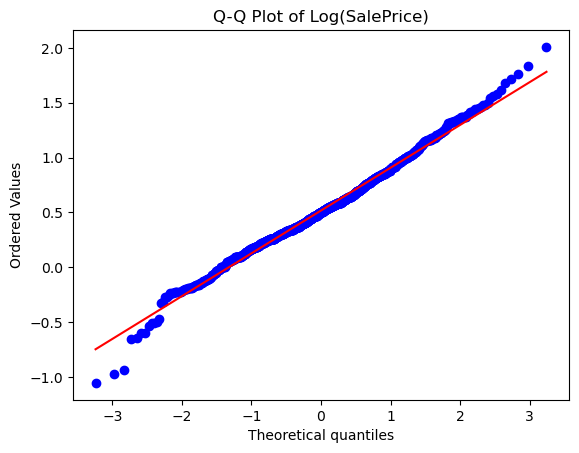

In [26]:
import scipy.stats as stats
# Q-Q Plot
stats.probplot(training["SalePrice"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log(SalePrice)")
plt.show()

# Feature Engineering